Import Library

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:

data = pd.read_csv("https://drive.google.com/uc?id=1vvYQ6JIbBA3bG8knCDQTRgO1rBKwBbHn")

EDA

In [3]:
data.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.isnull().all()

,0
Person ID,False
Gender,False
Age,False
Occupation,False
Sleep Duration,False
Quality of Sleep,False
Physical Activity Level,False
Stress Level,False
BMI Category,False
Blood Pressure,False


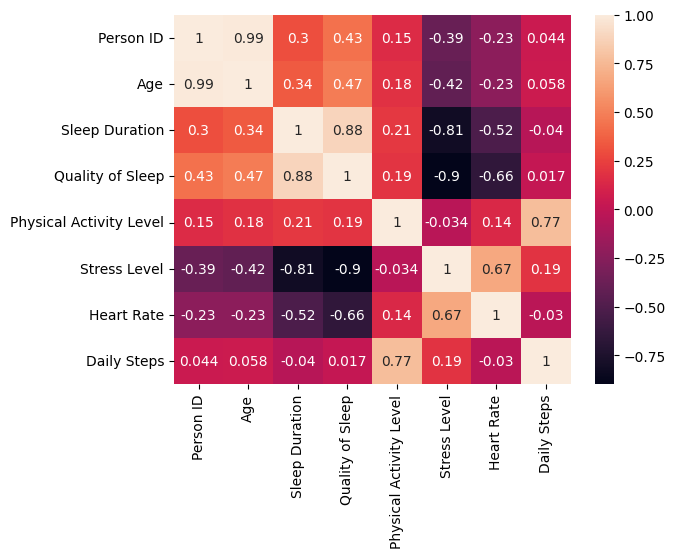

In [6]:
sns.heatmap(data.corr(numeric_only=True), annot=True);

In [7]:
# Recheck the column names in the dataset to confirm the correct names
data.columns.tolist()


['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [8]:
# Select relevant columns
columns_to_use = ['Gender', 'Age', 'Physical Activity Level', 'Stress Level', 'Sleep Duration']
data = data[columns_to_use]

# Encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male = 1, Female = 0

# Split features and target
X = data[['Gender', 'Age', 'Physical Activity Level', 'Stress Level']]
y = data['Sleep Duration']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

<ipython-input-8-650ccfd930eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male = 1, Female = 0


(array([[1.        , 0.5       , 0.25      , 0.8       ],
        [1.        , 0.1875    , 0.        , 1.        ],
        [1.        , 0.25      , 0.5       , 0.4       ],
        [0.        , 1.        , 0.75      , 0.        ],
        [0.        , 0.0625    , 0.16666667, 0.8       ]]),
 192    6.5
 75     6.0
 84     7.5
 362    8.2
 16     6.5
 Name: Sleep Duration, dtype: float64)

In [9]:
data.head(20)

,Gender,Age,Physical Activity Level,Stress Level,Sleep Duration
0,1,27,42,6,6.1
1,1,28,60,8,6.2
2,1,28,60,8,6.2
3,1,28,30,8,5.9
4,1,28,30,8,5.9
5,1,28,30,8,5.9
6,1,29,40,7,6.3
7,1,29,75,6,7.8
8,1,29,75,6,7.8
9,1,29,75,6,7.8


In [10]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',  # Mean squared error for regression
    metrics=['mae']  # Mean absolute error
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:

# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    epochs =50,
    validation_data = (X_test, y_test),
    callbacks = []
)

loss, mae = model.evaluate(X_test, y_test)
print(f"[Test loss: {loss:.4f}, Test MAE: {mae:.4f}]")

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 30.5010 - mae: 5.0995 - val_loss: 4.8508 - val_mae: 1.9977
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5639 - mae: 1.6120 - val_loss: 1.4161 - val_mae: 1.0177
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7759 - mae: 1.0545 - val_loss: 0.8467 - val_mae: 0.7165
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8857 - mae: 0.7345 - val_loss: 0.7235 - val_mae: 0.7012
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5759 - mae: 0.5864 - val_loss: 0.3631 - val_mae: 0.5059
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3804 - mae: 0.5169 - val_loss: 0.2201 - val_mae: 0.3342
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2227 - mae: 0.3660 - val_loss: 0.1372 - val_mae: 0.2936
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1167 - mae: 0.2591 - val_loss: 0.0483 - val_mae: 0.1606
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - ma

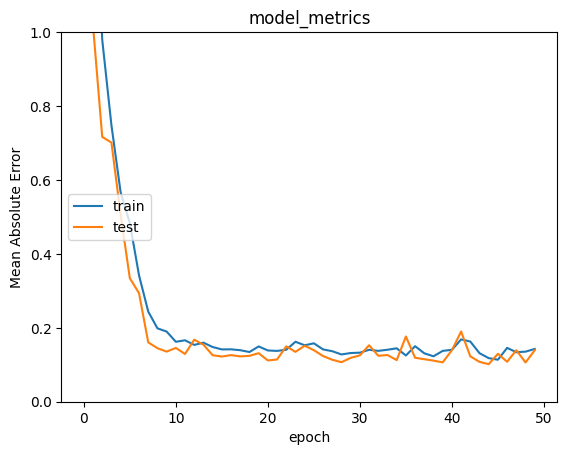

In [12]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model_metrics')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=1.0)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [13]:
# Example custom input: Gender (1), Age (25), Physical Activity (30), Stress Level (5)
new_input = [[1, 25, 30, 5]]
new_input_scaled = scaler.transform(new_input)  # Ensure scaling is applied
prediction = model.predict(new_input_scaled)
print(f"Predicted duration of Sleep: {prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted duration of Sleep: 6.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Tuning

In [14]:
!pip install -q -U keras-tuner

In [15]:
import keras_tuner as kt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
def model_builder(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(
        units=hp.Int('input_units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    # Add a second dense layer with tunable units
    model.add(Dense(
        units=hp.Int('hidden_units', min_value=32, max_value=512, step=32),
        activation='relu'
    ))

    # Output layer
    model.add(Dense(1))  # Single neuron for regression

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',  # Mean squared error for regression
        metrics=['mae']  # Mean absolute error
    )
    return model

In [17]:
# Initialize the tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_mae',  # Minimize validation MAE
    max_epochs=50,
    factor=2,
    directory='tuner_dir',
    project_name='sleep_duration_tuning'
)

Reloading Tuner from tuner_dir/sleep_duration_tuning/tuner0.json


In [18]:
# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')}, in the second layer is {best_hps.get('hidden_units')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 384, in the second layer is 480,
and the optimal learning rate for the optimizer is 0.001.



In [19]:
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"[Test loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}]")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 45.2787 - mae: 6.6637 - val_loss: 27.2142 - val_mae: 5.1213
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.0818 - mae: 4.3734 - val_loss: 5.3743 - val_mae: 1.8894
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4537 - mae: 1.9645 - val_loss: 5.4411 - val_mae: 2.0150
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1791 - mae: 2.0705 - val_loss: 2.0223 - val_mae: 1.1371
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6798 - mae: 1.3160 - val_loss: 1.8620 - val_mae: 1.0553
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9877 - mae: 1.1473 - val_loss: 1.2173 - val_mae: 0.9290
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5837 - mae: 1.0292 - val_loss: 1.2032 - val_mae: 0.8850
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2595 - mae: 0.8695 - val_loss: 0.8315 - val_mae: 0.7504
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0420 - mae: 0.8178 - val_loss: 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


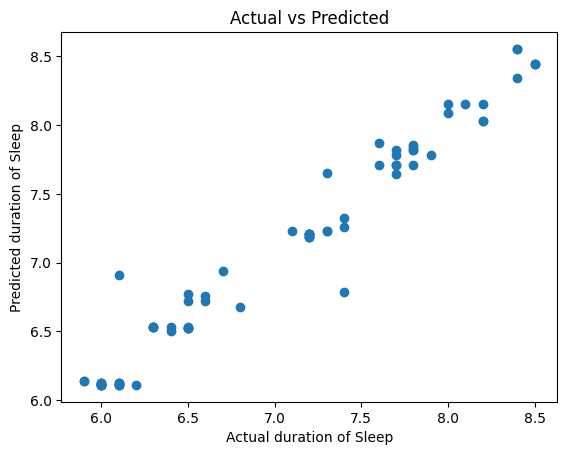

In [20]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual duration of Sleep')
plt.ylabel('Predicted duration of Sleep')
plt.title('Actual vs Predicted')
plt.show()

In [21]:
model.save('best_model_sleepduration.keras')